### Import Library

In [140]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import graphviz
from sklearn.model_selection import train_test_split ## 訓練、測試切割
import matplotlib.pyplot as plt
from scipy import stats

### Data Preprocessing

In [141]:
train_data = pd.read_csv("./adult/adult.data", header= None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

#刪除重複的值
print("原始比數：",train_data.shape)
train_data.drop_duplicates(inplace=True)
train_data = train_data.sort_index(axis=0)
print("刪除重複的值後：",train_data.shape)

#刪除問號的值(取眾數)
vals, counts = np.unique(train_data['workclass'],return_counts=True)
train_data['workclass'] = train_data['workclass'].replace(" ?", vals[np.argmax(counts)])
vals, counts = np.unique(train_data['occupation'],return_counts=True)
train_data['occupation'] = train_data['occupation'].replace(" ?", vals[np.argmax(counts)])
vals, counts = np.unique(train_data['native-country'],return_counts=True)
train_data['native-country'] = train_data['native-country'].replace(" ?", vals[np.argmax(counts)])

# 判斷是否還有空值
train_data.isnull().sum(axis=0)

# 刪除欄位意義重複的欄位
train_data.drop("education",axis=1,inplace=True)
train_data.drop("fnlwgt",axis=1,inplace=True)

# 每個元素的前後空格去掉
train_data = train_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

原始比數： (32561, 15)
刪除重複的值後： (32537, 15)


In [142]:
## 類別屬性做One-hot Encoding
train_nd = pd.get_dummies(train_data, columns=['workclass','marital-status','occupation','relationship','race','sex','native-country'], dtype=int)
train_nd

## 數值屬性做Normalization(z-score)
numerical_columns = ['age','education-num','capital-gain','capital-loss','hours-per-week']
scaler = preprocessing.StandardScaler()
train_nd[numerical_columns] = scaler.fit_transform(train_nd[numerical_columns])

## 類別屬性(income)做One-hot Encoding
label_encoder = preprocessing.LabelEncoder()
train_nd["income"] = label_encoder.fit_transform(train_nd["income"])

## 將"&"，改為and，以便作圖
train_nd = train_nd.rename(columns={'native-country_Trinadad&Tobago': 'native-country_Trinadad_and_Tobago'})

In [143]:
train_nd.describe()
train_nd.head(8)

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad_and_Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.030390,1.134777,0.148292,-0.216743,-0.035664,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.836973,1.134777,-0.145975,-0.216743,-2.222483,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042936,-0.420679,-0.145975,-0.216743,-0.035664,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.056950,-1.198407,-0.145975,-0.216743,-0.035664,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.776193,1.134777,-0.145975,-0.216743,-0.035664,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,-0.116262,1.523641,-0.145975,-0.216743,-0.035664,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,0.763647,-1.976134,-0.145975,-0.216743,-1.979503,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0.983625,-0.420679,-0.145975,-0.216743,0.369303,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [144]:
test_data = pd.read_csv("./adult/adult.test", header= None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
test_data.drop(0,axis=0,inplace=True)
#刪除重複的值
print("原始比數：",test_data.shape)
test_data.drop_duplicates(inplace=True)
test_data = test_data.sort_index(axis=0)
print("刪除重複的值後：",test_data.shape)

#刪除問號的值(取眾數)
vals, counts = np.unique(test_data['workclass'],return_counts=True)
test_data['workclass'] = test_data['workclass'].replace(" ?", vals[np.argmax(counts)])

vals, counts = np.unique(test_data['occupation'],return_counts=True)
test_data['occupation'] = test_data['occupation'].replace(" ?", vals[np.argmax(counts)])

vals, counts = np.unique(test_data['native-country'],return_counts=True)
test_data['native-country'] = test_data['native-country'].replace(" ?", vals[np.argmax(counts)])

# 刪除欄位意義重複的欄位
test_data.drop("education",axis=1,inplace=True)
test_data.drop("fnlwgt",axis=1,inplace=True)

# 每個元素的前後空格去掉
test_data = test_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# 判斷是否還有空值
test_data.isnull().sum(axis=0)

原始比數： (16281, 15)
刪除重複的值後： (16276, 15)


age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [145]:
## 類別屬性做One-hot Encoding
test_nd = pd.get_dummies(test_data,columns=['workclass','marital-status','occupation','relationship','race','sex','native-country'], dtype=int)
test_nd['native-country_Holand-Netherlands'] = 0

## 類別屬性(income)做One-hot Encoding
label_encoder = preprocessing.LabelEncoder()
test_nd["income"] = label_encoder.fit_transform(test_nd["income"])

## 數值屬性做Normalization(z-score)
numerical_columns = ['age','education-num','capital-gain','capital-loss','hours-per-week']
scaler = preprocessing.StandardScaler()
test_nd[numerical_columns] = scaler.fit_transform(test_nd[numerical_columns])

## 將"&"，改為and，以便作圖
test_nd = test_nd.rename(columns={'native-country_Trinadad&Tobago': 'native-country_Trinadad_and_Tobago'})


In [146]:
test_nd.describe()
test_nd.head(8)

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad_and_Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_Holand-Netherlands
1,-0.994356,-1.196669,-0.142684,-0.218097,-0.031615,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,-0.055664,-0.417699,-0.142684,-0.218097,0.769762,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,-0.777734,0.750757,-0.142684,-0.218097,-0.031615,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.377579,-0.028214,0.870916,-0.218097,-0.031615,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,-1.499805,-0.028214,-0.142684,-0.218097,-0.832992,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,-0.344492,-1.586154,-0.142684,-0.218097,-0.832992,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,-0.705527,-0.417699,-0.142684,-0.218097,-0.031615,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8,1.749513,1.919213,0.266421,-0.218097,-0.672717,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Dicision Tree

#### ID3

##### Model Constructure

In [147]:
from sklearn.tree import DecisionTreeClassifier
## 將訓練集與測試集分別切分特徵與目標欄位
train_x = train_nd.drop("income",axis=1)
train_x = train_x.sort_index(axis=1)
train_y = train_nd['income']

test_x = test_nd.drop("income",axis=1)
test_x = test_x.sort_index(axis=1)
test_y = test_nd['income']


## 建構決策樹模型
## 資料採random方式，不要用random_state=0
#criterion使用entropy來計算訊息增益;max_depth是指樹狀圖的最大深度
clf=DecisionTreeClassifier(max_depth=6,criterion='entropy',splitter='best',ccp_alpha=0.015)
clf.fit(train_x,train_y)

#評估決策器效能
acc = clf.score(train_x, train_y)
print(f'分類器準確度: {round(acc,2)}')

分類器準確度: 0.84


##### Performance test

In [148]:
from sklearn import metrics
## 預測測試資料
predict_y = clf.predict(test_x)
accuracy = metrics.accuracy_score(test_y, predict_y)
print(f'測試準確度: {round(accuracy,2)}')

測試準確度: 0.84


##### 作圖

In [149]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# dot_graph = export_graphviz(clf, out_file=None, label='all', class_names=['>50K', '<=50K'],
#                 feature_names=train_x.columns, impurity=False, proportion=True, filled=True,rounded=True,special_characters=True)
# result_img=graphviz.Source(dot_graph)
# result_img

font_path = f'C:\Windows\Fonts\simsun.ttc'
font_name = 'SimSun'

dot_data = export_graphviz(clf, out_file=None, label='all', impurity=False, proportion=True, filled=True, rounded=True,  
                           special_characters=True, feature_names=train_x.columns, class_names=['小(等)於50K', '大於50K'],fontname=font_name)
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())
# 保存成圖片檔案
# 可選擇其他格式如 'pdf', 'svg', 'png', 'jpeg', 'gif', etc.
graph = graphviz.Source(dot_data, format='png', filename='adult_decision_tree_id3')
graph.render(view=True)

'adult_decision_tree_id3.png'

##### 匯出excel

In [106]:
test_data = pd.read_csv("adult/adult.test", header= None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
test_data.drop(0,axis=0,inplace=True)
#刪除重複的值
test_data_new = test_data.drop_duplicates()

predict_y_label = []
for i in range(len(predict_y)):
    if(predict_y[i]==0):
        predict_y_label.append("<=50K")
    else:
        predict_y_label.append(">50K")
predict_y_label = pd.DataFrame(predict_y_label)
result = pd.concat([test_data_new, predict_y_label], axis=1)
result.to_csv("adult_id3_test.csv",header=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income','income_predict'])


In [135]:
result

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<=50K
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.,NaN
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.,NaN
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,NaN
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.,NaN


In [108]:
result1 = result.sort_index(axis=0)
result1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<=50K
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.,NaN
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.,NaN
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,NaN
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.,NaN


##### 找重要特徵

In [109]:
clf.feature_importances_

array([0.        , 0.22278327, 0.        , 0.21596608, 0.        ,
       0.        , 0.        , 0.56125065, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

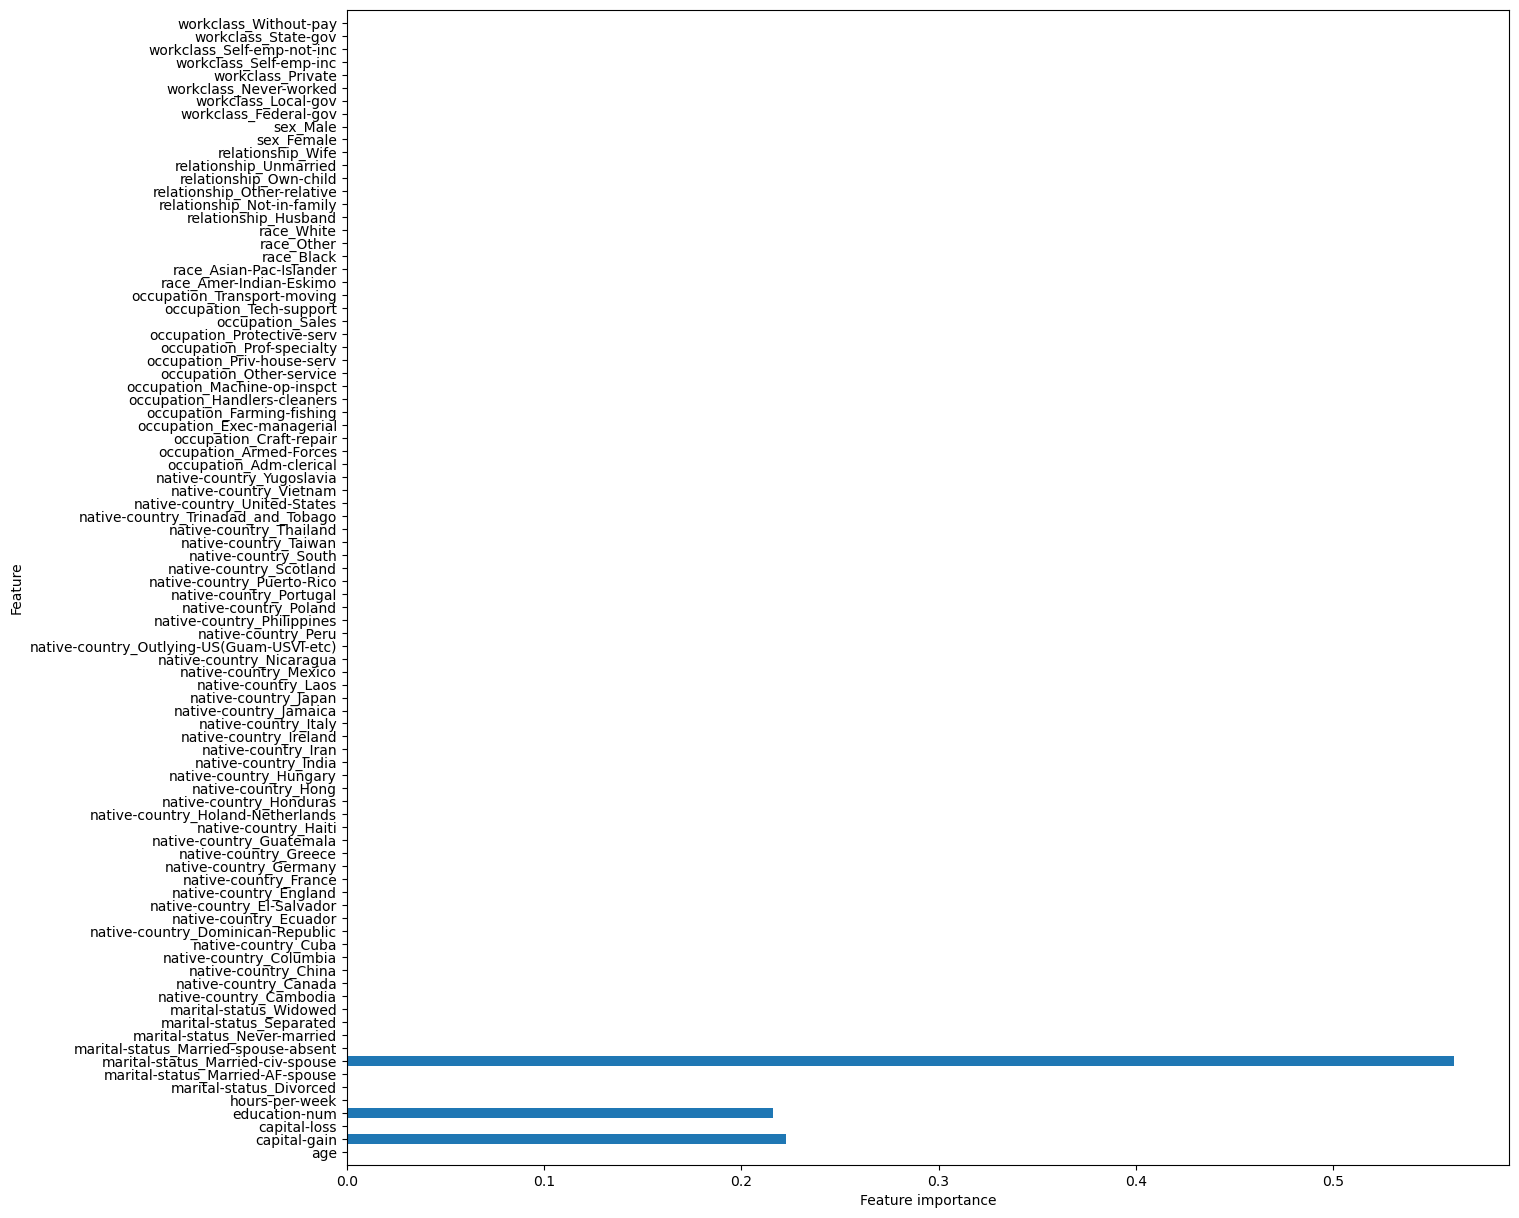

In [136]:
#以圖表事每個特徵變數的重要程度(0最小，1最大)
def plot_feature_importances_cancer(model):
    n_features = train_x.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(clf)

#### CART

##### Model Constructure

In [137]:
from sklearn.tree import DecisionTreeClassifier
## 將訓練集與測試集分別切分特徵與目標欄位
train_x = train_nd.drop("income",axis=1)
train_x = train_x.sort_index(axis=1)
train_y = train_nd['income']

test_x = test_nd.drop("income",axis=1)
test_x = test_x.sort_index(axis=1)
test_y = test_nd['income']

## 將"&"，改為and，以便作圖
train_x = train_x.rename(columns={'native-country_Trinadad&Tobago': 'native-country_Trinadad_and_Tobago'})
test_x = test_x.rename(columns={'native-country_Trinadad&Tobago': 'native-country_Trinadad_and_Tobago'})

## 建構決策樹模型
## 資料採random方式，不要用random_state=0
#criterion使用entropy來計算訊息增益;max_depth是指樹狀圖的最大深度
clf=DecisionTreeClassifier(max_depth=10,criterion='gini',splitter='best')
clf.fit(train_x,train_y)


#評估決策器效能
acc = clf.score(train_x, train_y)
print(f'分類器準確度: {round(acc,2)}')

分類器準確度: 0.87


In [138]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(train_x, train_y)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.07230261470984062


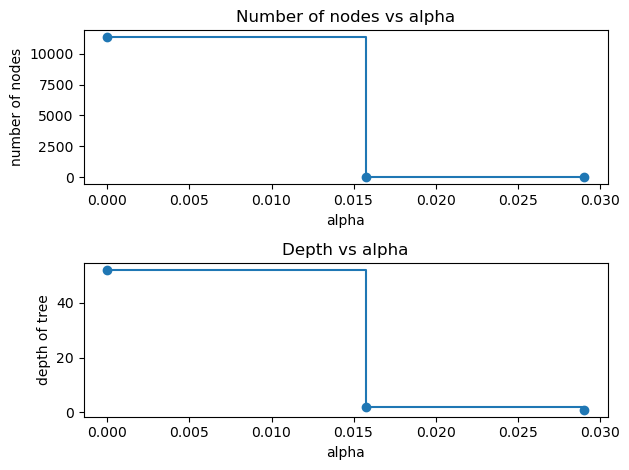

In [139]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

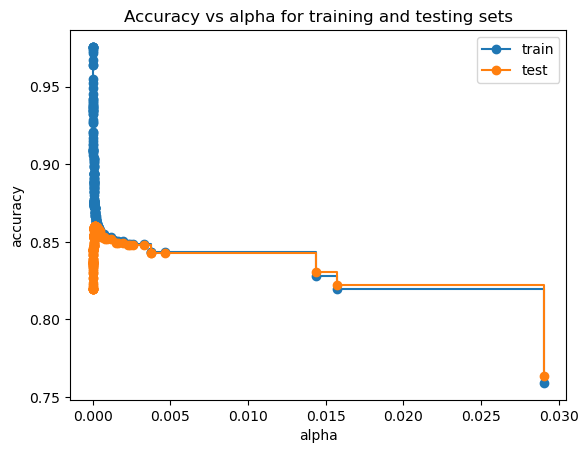

In [114]:
train_scores = [clf.score(train_x, train_y) for clf in clfs]
test_scores = [clf.score(test_x, test_y) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

##### Validation test

##### Performance test

In [115]:
from sklearn import metrics
## 預測測試資料
predict_y = clf.predict(test_x)
accuracy = metrics.accuracy_score(test_y, predict_y)
print(f'測試準確度: {round(accuracy,2)}')

測試準確度: 0.76


In [116]:
#輸出混亂矩陣，顯示準確率
from sklearn.metrics import confusion_matrix,classification_report
print("輸出混亂矩陣，顯示準確率：使用驗證資料")
print(confusion_matrix(test_y,predict_y))
## 一般情況zero_division會設1(true)，除非確定每個類別都有被預測到才會設0
print(classification_report(test_y,predict_y,zero_division=1))

輸出混亂矩陣，顯示準確率：使用驗證資料
[[12430     0]
 [ 3846     0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     12430
           1       1.00      0.00      0.00      3846

    accuracy                           0.76     16276
   macro avg       0.88      0.50      0.43     16276
weighted avg       0.82      0.76      0.66     16276



--------------------------

### Choose the best model and evaluation

In [117]:
from sklearn.model_selection import GridSearchCV
## 定義超參數的網格
param_grid = {
    'criterion': ['gini'],
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_split': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [2,4,6,8,10,12,14,16,18,20]
}
# 使用 GridSearchCV 進行網格搜索
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=7)
grid_search.fit(train_x, train_y)

acc = grid_search.score(train_x, train_y)
print(f'網格搜尋模型準確度: {round(acc,2)}')
# 顯示最佳超參數組合
print("Best parameters found: ", grid_search.best_params_)

網格搜尋模型準確度: 0.76
Best parameters found:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [72]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064578,0.005550,0.006142,0.000987,gini,2,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.759088,0.759251,0.759036,0.759036,0.759036,0.759036,0.759036,0.759074,0.000074,1
1,0.062024,0.005283,0.005000,0.001070,gini,2,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.759088,0.759251,0.759036,0.759036,0.759036,0.759036,0.759036,0.759074,0.000074,1
2,0.070456,0.016102,0.006571,0.002719,gini,2,2,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.759088,0.759251,0.759036,0.759036,0.759036,0.759036,0.759036,0.759074,0.000074,1
3,0.060616,0.004990,0.005717,0.000701,gini,2,2,8,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.759088,0.759251,0.759036,0.759036,0.759036,0.759036,0.759036,0.759074,0.000074,1
4,0.057144,0.003759,0.004858,0.000639,gini,2,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.759088,0.759251,0.759036,0.759036,0.759036,0.759036,0.759036,0.759074,0.000074,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.252811,0.007180,0.006209,0.008004,gini,20,20,12,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.759088,0.759251,0.759036,0.759036,0.759036,0.759036,0.759036,0.759074,0.000074,1
996,0.258038,0.012264,0.003897,0.005882,gini,20,20,14,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.759088,0.759251,0.759036,0.759036,0.759036,0.759036,0.759036,0.759074,0.000074,1
997,0.270108,0.019615,0.008494,0.008444,gini,20,20,16,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.759088,0.759251,0.759036,0.759036,0.759036,0.759036,0.759036,0.759074,0.000074,1
998,0.261626,0.021431,0.006267,0.007074,gini,20,20,18,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.759088,0.759251,0.759036,0.759036,0.759036,0.759036,0.759036,0.759074,0.000074,1


In [118]:
# grid_search.cv_results_.get('rank_test_score')[0:3]

# 找到排名前三的索引
top_three_indices = grid_search.cv_results_.get('rank_test_score').argsort()[:3]

# 打印排名前三的參數組合及其平均測試分數
for index in top_three_indices:
    params = grid_search.cv_results_.get('params')[index]
    mean_score = grid_search.cv_results_.get('mean_test_score')[index]
    print(f"Rank: {grid_search.cv_results_.get('rank_test_score')[index]}, Mean score: {mean_score:.4f}, Parameters: {params}")


Rank: 1, Mean score: 0.7591, Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
Rank: 1, Mean score: 0.7591, Parameters: {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 12, 'min_samples_split': 18}
Rank: 1, Mean score: 0.7591, Parameters: {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 12, 'min_samples_split': 20}


In [119]:
predict_y = grid_search.predict(test_x)
accuracy = metrics.accuracy_score(test_y, predict_y)
print(f'測試準確度: {round(accuracy,2)}')

測試準確度: 0.76


分類器準確度: 0.83


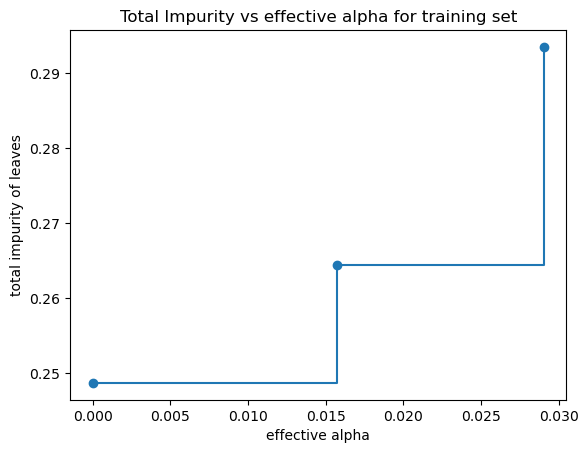

In [120]:
## 建構決策樹模型
## 資料採random方式，不要用random_state=0
#criterion使用entropy來計算訊息增益;max_depth是指樹狀圖的最大深度
clf_After=DecisionTreeClassifier(max_depth=2,criterion='gini',splitter='best', ccp_alpha=0.002)
path = clf_After.cost_complexity_pruning_path(train_x, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clf_After.fit(train_x,train_y)

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

#評估決策器效能
acc = clf_After.score(train_x, train_y)
print(f'分類器準確度: {round(acc,2)}')

In [121]:
from sklearn import metrics
## 預測測試資料
predict_y_after = clf_After.predict(test_x)
accuracy_after = metrics.accuracy_score(test_y, predict_y_after)
print(f'測試準確度: {round(accuracy_after,2)}')

測試準確度: 0.83


In [122]:
#輸出混亂矩陣，顯示準確率
from sklearn.metrics import confusion_matrix,classification_report
print("輸出混亂矩陣，顯示準確率：使用驗證資料")
print(confusion_matrix(test_y,predict_y_after))
## 一般情況zero_division會設1(true)，除非確定每個類別都有被預測到才會設0
print(classification_report(test_y,predict_y_after,zero_division=1))

輸出混亂矩陣，顯示準確率：使用驗證資料
[[11803   627]
 [ 2129  1717]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     12430
           1       0.73      0.45      0.55      3846

    accuracy                           0.83     16276
   macro avg       0.79      0.70      0.73     16276
weighted avg       0.82      0.83      0.81     16276

